# Imports.

In [ ]:
import pandas as pd
import numpy as np

# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For Encoding
from sklearn.preprocessing import OrdinalEncoder

# Uploading Dataset.

In [ ]:
# Mounting drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Uploading dataset
df = pd.read_csv('/content/drive/MyDrive/Pod 4/Work and Self-Rated Mental Health Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1576 non-null   object 
 1   gender                    1576 non-null   object 
 2   covid_distancing          1576 non-null   object 
 3   covid_masks               1576 non-null   object 
 4   vaccinated                1576 non-null   object 
 5   self_rated_mental_health  1576 non-null   object 
 6   ethnicity                 1576 non-null   object 
 7   hours                     1576 non-null   float64
 8   occupation                1576 non-null   object 
 9   work_from_home            1576 non-null   object 
 10  income                    1576 non-null   object 
 11  educational_attainment    1576 non-null   object 
dtypes: float64(1), object(11)
memory usage: 147.9+ KB


# Data Cleaning.

In [ ]:
# Since there is no null values and no columns we want to drop we set df equal to df_clean
df_clean = df

# Data Encoding.

It's important for us to encode certain columns using different encoding methods because particular methods represent the original data more accurately than others. Hence, models interpret them more correctly or can find correlation. (ie, it's not a one size fits all)

In [ ]:
df_clean.head()

,age,gender,covid_distancing,covid_masks,vaccinated,self_rated_mental_health,ethnicity,hours,occupation,work_from_home,income,educational_attainment
0,40 to 49 years-old,Non-binary,Very Closely,Very Closely,"Yes, two doses",Positive,"African, Caribbean, or Black",10.0,"education, law and social, community, and gove...",Hybrid,"$60,000 to $89,999",Bachelor's Degree or Higher
1,18 to 29 years-old,Woman,Somewhat,Very Closely,"Yes, one dose",Positive,"African, Caribbean, or Black",6.0,Management,Hybrid,"Less than $30,000",Some College
2,30 to 39 years-old,Man,Somewhat,Somewhat,"Yes, one dose",Positive,Middle Eastern,2.0,Business,Hybrid,"Less than $30,000",Bachelor's Degree or Higher
3,60 years and older,Woman,Somewhat,Very Closely,"Yes, two doses",Positive,White,40.0,Management,Hybrid,"$30,000 to $59,999",Bachelor's Degree or Higher
4,30 to 39 years-old,Man,Somewhat,Not at all,No,Negative,Other,7.0,Business,Hybrid,"$30,000 to $59,999",Bachelor's Degree or Higher


In [ ]:
# Splitting columns into ones to one-hot encode versus label encode
# (nominal -> there's no ranking or natural order VS ordinal -> there is an order or natural ranking)
nominal_cols = ['gender', 'self_rated_mental_health', 'ethnicity', 'occupation', 'work_from_home']
ordinal_cols = ['age','covid_distancing', 'covid_masks', 'vaccinated', 'income', 'educational_attainment']

# One Hot Encoding Nominal:

# Encoding nominal_cols using One-Hot-Encoding
df_encoded = pd.get_dummies(df_clean, columns = nominal_cols)

# Label Encoding Ordinal:

# Custom orders for each column
custom_orders = [
    ['18 to 29 years-old', '30 to 39 years-old', '40 to 49 years-old', '50 to 59 years-old', '60 years and older'],  # 'Order for "age"
    ['Not at all', 'Somewhat', 'Very Closely'],   # Order for "covid_distancing"
    ['Not at all', 'Somewhat', 'Very Closely'],   # Order for "covid_masks"
    ['No', 'Yes, one dose', 'Yes, two doses'],   # Order for "vaccinated"
    ['Less than $30,000', '$30,000 to $59,999', '$60,000 to $89,999', '$90,000 or more'],    # Order for "income"
    ['High School Diploma or Lower', 'Some College', "Bachelor's Degree or Higher"],    # Order for "educational_attainment"
]

# Apply OrdinalEncoder with custom orders
encoder = OrdinalEncoder(categories=custom_orders)
encoded_ordinal_cols = encoder.fit_transform(df_encoded[ordinal_cols])

# Add the encoded columns to the DataFrame
df_encoded[ordinal_cols] = encoded_ordinal_cols

# Check the assigned values for each column
for col, categories in zip(df_encoded[ordinal_cols], encoder.categories_):
    print(f"\nMappings for '{col}':")
    for idx, category in enumerate(categories):
        print(f"  {category}: {idx}")

# Dropping 'self_rated_mental_health_Positive' since it is the opposite of our target/duplicate from encoding
df_encoded = df_encoded.drop(columns='self_rated_mental_health_Negative')

# Viewing encoded data
print(" ")
df_encoded.info()
print(" ")
df_encoded.head()
# add male column
#class weights parameter lower gamma



Mappings for 'age':
  18 to 29 years-old: 0
  30 to 39 years-old: 1
  40 to 49 years-old: 2
  50 to 59 years-old: 3
  60 years and older: 4

Mappings for 'covid_distancing':
  Not at all: 0
  Somewhat: 1
  Very Closely: 2

Mappings for 'covid_masks':
  Not at all: 0
  Somewhat: 1
  Very Closely: 2

Mappings for 'vaccinated':
  No: 0
  Yes, one dose: 1
  Yes, two doses: 2

Mappings for 'income':
  Less than $30,000: 0
  $30,000 to $59,999: 1
  $60,000 to $89,999: 2
  $90,000 or more: 3

Mappings for 'educational_attainment':
  High School Diploma or Lower: 0
  Some College: 1
  Bachelor's Degree or Higher: 2
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 30 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   age                                                             

,age,covid_distancing,covid_masks,vaccinated,hours,income,educational_attainment,gender_Man,gender_Non-binary,gender_Woman,...,occupation_Manufacturing and utilities,occupation_Natural and applied sciences,occupation_Natural resources and agriculture,occupation_Sales and service,"occupation_Trades, transport and equipment operators","occupation_art, culture, recreation and sport","occupation_education, law and social, community, and government services",work_from_home_Do Not Work from Home,work_from_home_Hybrid,work_from_home_Work from Home Only
0,2.0,2.0,2.0,2.0,10.0,2.0,2.0,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0.0,1.0,2.0,1.0,6.0,0.0,1.0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,1.0,1.0,1.0,1.0,2.0,0.0,2.0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,4.0,1.0,2.0,2.0,40.0,1.0,2.0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,1.0,1.0,0.0,0.0,7.0,1.0,2.0,True,False,False,...,False,False,False,False,False,False,False,False,True,False


#Visuals.

In [ ]:
# Data Setup
# Setting target to our target column -> 'self_rated_mental_health_Negative'
target = ('self_rated_mental_health_Positive')

# Define features (X) and target (y)
X = df_encoded.drop(columns=[target])  # Features
y = df_encoded[target]  # Target variable

###PCA Visual.

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Creating PCA and fitting it on features
pca = PCA(n_components = 0.95)
X_pca = pca.fit_transform(X)

# Check PCA_features
print(f"Original shape: {X.shape}")
print(f"Transformed shape (after PCA): {X_pca.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Number of components chosen: {pca.n_components_}")

# Plot
#plt.figure(figsize = (10,6))
#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='jet', edgecolor='k', s=40)
#plt.colorbar()
#plt.title("PCA Visualization")
#plt.show()

Original shape: (1576, 29)
Transformed shape (after PCA): (1576, 1)
Explained variance ratio: [0.97910757]
Number of components chosen: 1


Original shape: (1576, 29)
Scales shape: (1576, 29)
Transformed shape (after PCA): (1576, 2)
Explained variance ratio: [0.09387569 0.06288919]
Number of components chosen: 2


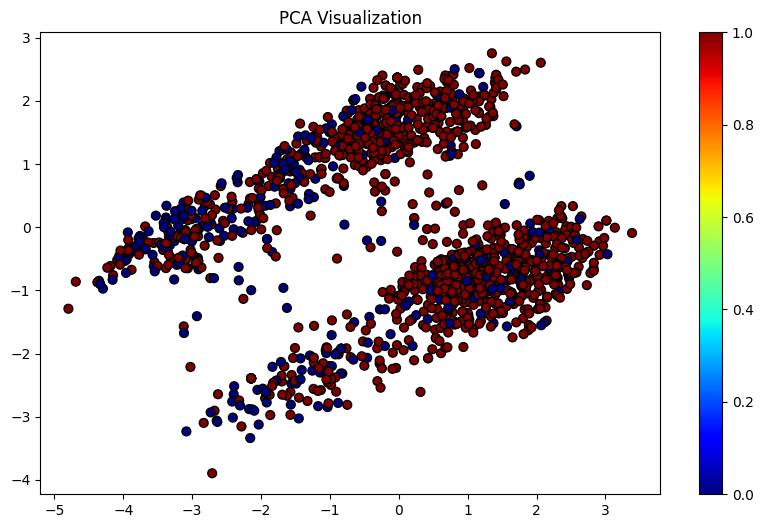

In [ ]:
# SCALED X
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 2: Standardize the data (PCA assumes data is centered and scaled)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Creating PCA and fitting it on features
pca = PCA(n_components = 0.10)
X_pca = pca.fit_transform(X_scaled)

# Check PCA_features
print(f"Original shape: {X.shape}")
print(f"Scales shape: {X_scaled.shape}")
print(f"Transformed shape (after PCA): {X_pca.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Number of components chosen: {pca.n_components_}")

# Plot
plt.figure(figsize = (10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='jet', edgecolor='k', s=40)
plt.colorbar()
plt.title("PCA Visualization")
plt.show()

###T-SNE Visual

Original shape: (1576, 29)
Transformed shape (after PCA): (1576, 3)


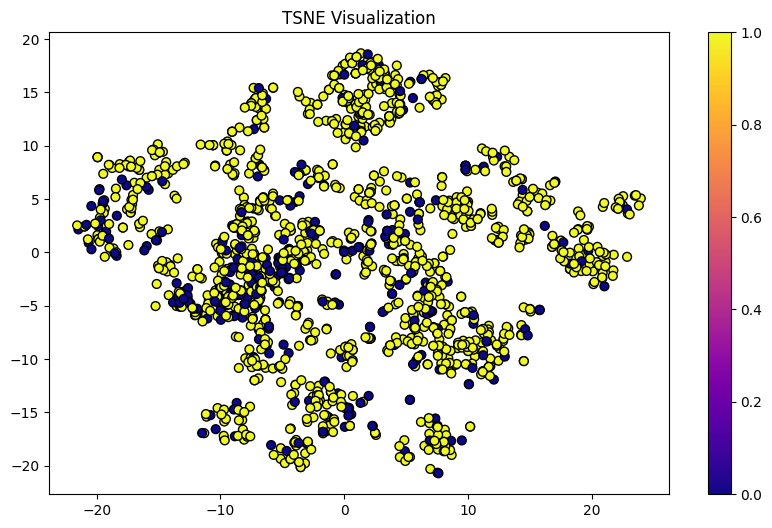

In [ ]:
# Imports
from sklearn.manifold import TSNE

# Step 2: Standardize the data (PCA assumes data is centered and scaled)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=3, perplexity = 20)
X_tsne = tsne.fit_transform(X_scaled)

# Check TSNE_features
print(f"Original shape: {X.shape}")
print(f"Transformed shape (after PCA): {X_tsne.shape}")

# Plot
plt.figure(figsize = (10,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='plasma', edgecolor='k', s=40)
plt.colorbar()
plt.title("TSNE Visualization")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Original shape: (1576, 29)
Transformed shape (after PCA): (1576, 3)


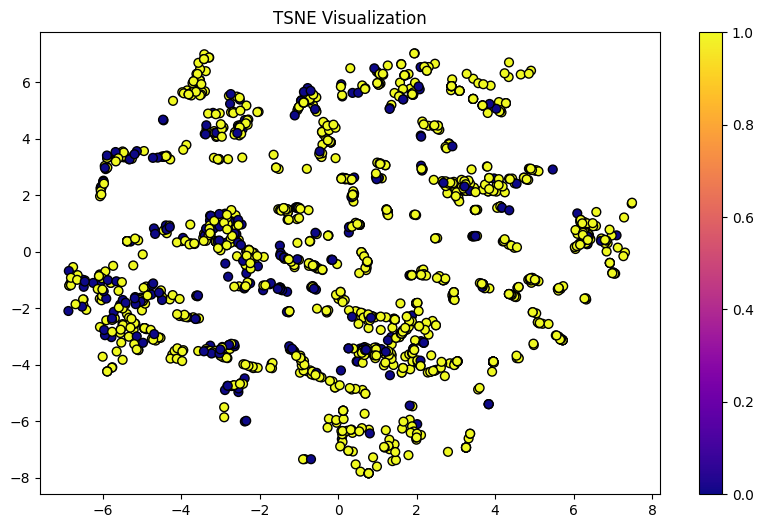

In [ ]:
# SCALED X
# Imports
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Step 2: Standardize the data (PCA assumes data is centered and scaled)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=3, random_state=0, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

# Check TSNE_features
print(f"Original shape: {X.shape}")
print(f"Transformed shape (after PCA): {X_tsne.shape}")

# Plot
plt.figure(figsize = (10,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='plasma', edgecolor='k', s=40)
plt.colorbar()
plt.title("TSNE Visualization")
plt.show()

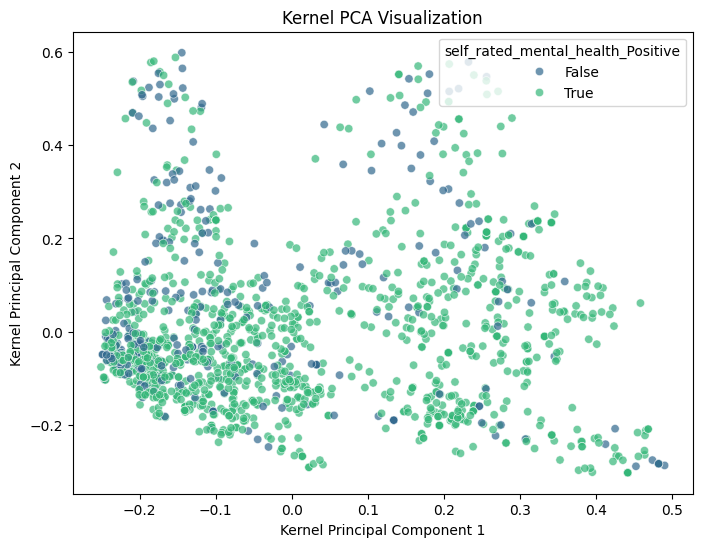

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Kernel PCA with RBF (Gaussian) Kernel
kpca = KernelPCA(n_components=15, kernel="rbf", gamma=0.05)
X_kpca = kpca.fit_transform(X_scaled)

# Scatter plot of transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_kpca[:, 0], y=X_kpca[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.xlabel("Kernel Principal Component 1")
plt.ylabel("Kernel Principal Component 2")
plt.title("Kernel PCA Visualization")
plt.show()

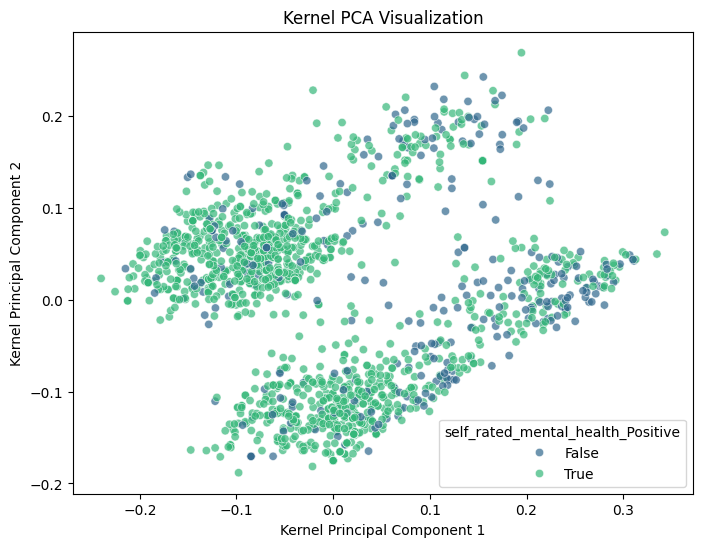

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Kernel PCA with RBF (Gaussian) Kernel
kpca = KernelPCA(n_components=10, kernel="poly", gamma=0.001, degree=5)
X_kpca = kpca.fit_transform(X_scaled)

# Scatter plot of transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_kpca[:, 0], y=X_kpca[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.xlabel("Kernel Principal Component 1")
plt.ylabel("Kernel Principal Component 2")
plt.title("Kernel PCA Visualization")
plt.show()

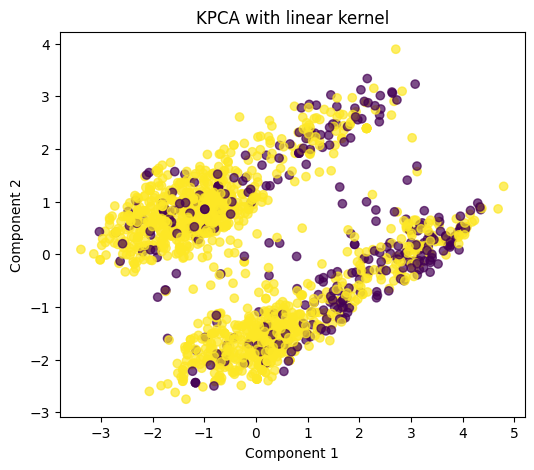

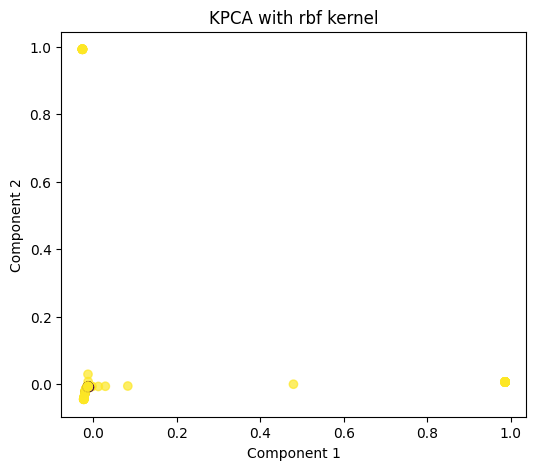

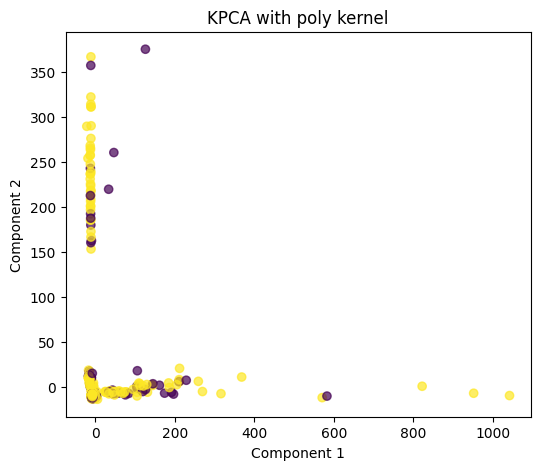

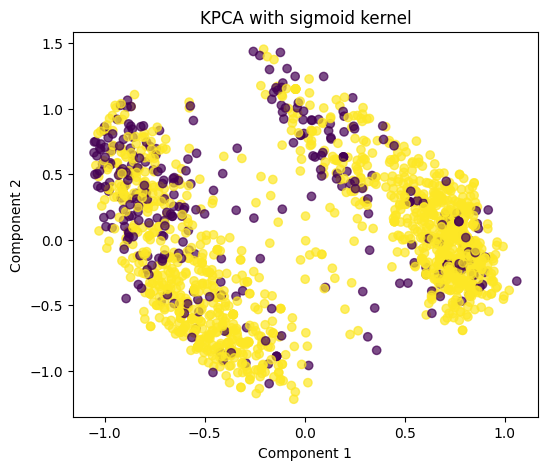

In [ ]:
for kernel in ["linear", "rbf", "poly", "sigmoid"]:
    kpca = KernelPCA(n_components=15, kernel=kernel, gamma=0.99)
    X_kpca = kpca.fit_transform(X_scaled)

    plt.figure(figsize=(6, 5))
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap="viridis", alpha=0.7)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title(f"KPCA with {kernel} kernel")
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

# Setting target to our target column -> 'self_rated_mental_health_Negative'
target = ('self_rated_mental_health_Positive')

# Define features (X) and target (y)
X = df_encoded.drop(columns=[target])  # Features
y = df_encoded[target]  # Target variable

# Standardize the data (PCA assumes data is centered and scaled)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Kernel PCA (non-linear dimensionality reduction)
kpca = KernelPCA(n_components=25, kernel='rbf', gamma=0.2)  # Try 'poly', 'sigmoid', etc.
X_kpca = kpca.fit_transform(X_scaled)

# Create a DataFrame of new PCA features
n_components=25
kpca_features = pd.DataFrame(X_kpca, columns=[f"PC{i+1}" for i in range(n_components)])

# Print the first few rows
print(kpca_features.head())
# Imports.
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(kpca_features, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution before SMOTE
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_train_smote))

In [ ]:
for kernel in ["linear", "rbf", "poly", "sigmoid"]:
    kpca = KernelPCA(n_components=2, kernel=kernel, gamma=0.25)
    X_kpca = kpca.fit_transform(X_scaled)


    plt.figure(figsize=(6, 5))
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap="viridis", alpha=0.7)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title(f"KPCA with {kernel} kernel")
    plt.show()